<a href="https://colab.research.google.com/github/ynpreet/Game-Of-Thrones-Sentiment-Analysis-using-Twitter-data/blob/Colab-files/GameOfThrones_CharacterImportance_And_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GameOfThrones Character Importance And Survival Prediction

*Author: Preet Mehta*

In [ ]:
!pip install dplython

     |████████████████████████████████| 715 kB 14.9 MB/s 
  Created wheel for dplython: filename=dplython-0.0.7-py3-none-any.whl size=747242 sha256=470c08396b4ee69e96465f125c3a817a0c52ab89452ed52195339326b3561884
  Stored in directory: /root/.cache/pip/wheels/3f/aa/f2/d301d57e16e884f9f86c2bbd417920a381405d0a576b40856f
Successfully built dplython


In [ ]:
! pip install chart_studio

     |████████████████████████████████| 64 kB 2.2 MB/s 


/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/chart_studio-1.1.0.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


In [ ]:
# !pip install dash
# import plotly.express as px
# !pip install plotly==5.3.1
# import plotly
# plotly.__version__

     |████████████████████████████████| 23.9 MB 2.1 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


'5.3.1'

In [ ]:
import os
import pandas as pd
import numpy as np
from dplython import (DplyFrame, X, diamonds, select, sift, sample_n, sample_frac, arrange, mutate, group_by, summarize)

# import plotly.plotly
import chart_studio
import chart_studio.plotly
import plotly.graph_objs as go
import plotly.offline as offline
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
from plotly import tools

import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True

# out_dir = '/Users/genie/dev/projects/github/got_survival_analysis/out'
# os.chdir(out_dir)

include_plotlyjs=False

/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject



In [53]:
data_path = '/content/got_characters_s1_to_s7.csv'
character_df = pd.read_csv(data_path,quotechar='"',na_values='',encoding = "ISO-8859-1")

In [54]:
character_df['total_screen_time'] = character_df.apply(lambda x: sum([x['s'+str(i)+'_screenTime'] for i in range(1,8)]), axis=1)
character_df['num_of_episodes_appeared'] = character_df.apply(lambda x: sum([x['s'+str(i)+'_episodes'] for i in range(1,8)]), axis=1)
character_df['num_of_people_killed'] = character_df.apply(lambda x: sum([x['s'+str(i)+'_numKilled'] for i in range(1,8)]), axis=1)

In [55]:
character_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 71 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   character_name                    368 non-null    object 
 1   gender                            337 non-null    object 
 2   house                             86 non-null     object 
 3   spouse                            43 non-null     object 
 4   parents                           56 non-null     object 
 5   siblings                          56 non-null     object 
 6   parent_of                         37 non-null     object 
 7   royal                             368 non-null    int64  
 8   kingsguard                        368 non-null    int64  
 9   guardian_of                       12 non-null     object 
 10  guarded_by                        9 non-null      object 
 11  served_by                         4 non-null      object 
 12  serves  

In [56]:
import plotly.graph_objects as go
import plotly.io as pio

In [57]:
# chart of characters by screen time and influence
df2 = character_df
df2 = df2[df2.house.notnull()]
df2['house'] = df2.apply(lambda x: x['house'].split(';')[0], axis=1)

# chart
categories = list(df2['house'].unique())
seasons = [1,2,3,4,5,6,7]

figure = {
    'data': [],
    'layout': {},
    'frames': []
}

figure['layout']['xaxis'] = {'range': [0, 150], 'title': 'screen time (mins)'}
figure['layout']['yaxis'] = {'range': [0, 0.6], 'tick0': 0, 'dtick':0.05, 'title': 'eigen vector centrality'}
figure['layout']['title'] = 'Chart-1: Game of Thrones Character Importance (Season1-7) <br><span style="font-size:x-small;width:50%;">NOTE: This is an interactive chart, please hover over individual bubbles for more detailed information. Also you may selectively enable or disable legend items to isolate individual category or more.</span>'

figure['layout']['hovermode'] = 'closest'
figure['layout']['legend'] = { 'font' : {'family':'sans-serif','size':12} }
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 400,
            'easing': 'cubic-in-out'
        }
    ],
    'initialValue': 1,
    'plotlycommand': 'animate',
    'values': seasons,
    'visible': True
}

figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': '',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

# make data
season = seasons[0]
for category in categories:
#     dataset_by_year = df2[df2.fiscal_year == year]
#     dataset_by_year_and_cat = dataset_by_year[dataset_by_year.category == category]
    dataset = df2[df2.house == category]

    data_dict = {
        'x': list(dataset['s1_screenTime']),
        'y': list(dataset['s1_ec']),
        'mode': 'markers',
        'text': list(dataset['character_name']),
        'marker': {
            'sizemode': 'area',
            'sizeref': 0.1,
            'size': list(dataset['s1_screenTime'])
        },
        'name': category
    }
    figure['data'].append(data_dict)


# make frames
for season in seasons:
    frame = {'data': [], 'name': str(season)}
    season_prefix = 's' + str(season) + '_'
    for category in categories:
        dataset = df2[df2.house == category]

        data_dict = {
            'x': list(dataset[season_prefix+'screenTime']),
            'y': list(dataset[season_prefix+'ec']),
            'mode': 'markers',
            'text': list(dataset['character_name']),
            'marker': {
                'sizemode': 'area',
                'sizeref': 0.1,
                'size': list(dataset[season_prefix + 'screenTime'])
            },
            'name': category
        }
        frame['data'].append(data_dict)

    figure['frames'].append(frame)
    slider_step = {'args': [
        [season],
        {'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': 'Season' + str(season),
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

# fig = go.Figure(go.Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1]))
# fig.update_layout(title_text='hello world')
# pio.write_html(fig, file='hello_world.html', auto_open=True)
figure['layout']['sliders'] = [sliders_dict]
# pio.write_html(figure, file='chart1.html', auto_open=True)
pio.show(figure, file='chart1.html', auto_open=True)

# plotly.io.show(figure, include_plotlyjs=include_plotlyjs, filename='chart1.html')

In [ ]:
## chart of overall screen time by characters

df2 = character_df[['character_name','total_screen_time','s1_screenTime','s2_screenTime','s3_screenTime','s4_screenTime','s5_screenTime','s6_screenTime','s7_screenTime']].sort_values(by=['total_screen_time'], ascending=False).head(30)

traces = []
for i in range(1,8):
    s_prefix = 's' + str(i) + '_'
    traces.append(
        go.Bar(
            x = list(df2['character_name'].values),
            y = list(df2[s_prefix + 'screenTime'].values),
            name = 'Season ' + str(i)
        )
    )

data = [traces[i] for i in range(len(traces))]
title = 'Chart-2: Game of Thrones Character Overall Screen Times (Season1-7) ' + \
'<br><span style="font-size:x-small;width:50%;">NOTE: click on individual legend items to the right to selectively enable or disable a color group</span>'
layout = go.Layout(barmode='stack', title = title, yaxis=dict(title='screen time (mins)'))

fig = go.Figure(data=data, layout=layout)
# plotly.offline.plot(fig, include_plotlyjs=include_plotlyjs, filename='chart2.html')
pio.show(fig, file='chart2.html', auto_open=True)



In [ ]:
df1 = character_df[['character_name','total_screen_time']]
df1['total_screen_time_in_hrs'] = df1.apply(lambda x: round(x['total_screen_time']/60,2), axis=1)
df1.sort_values(by=['total_screen_time'], ascending=False).head(10)

,character_name,total_screen_time,total_screen_time_in_hrs
330,Tyrion Lannister,549.29,9.15
119,Jon Snow,547.56,9.13
44,Daenerys Targaryen,420.02,7.00
38,Cersei Lannister,399.53,6.66
285,Sansa Stark,362.74,6.05
15,Arya Stark,332.67,5.54
109,Jaime Lannister,329.04,5.48
121,Jorah Mormont,298.53,4.98
317,Theon Greyjoy,246.46,4.11
47,Davos Seaworth,241.75,4.03


In [ ]:
### death count by season

seasons = [1,2,3,4,5,6,7] 

x_labels = seasons
y_labels =['death count']

x_data = []
for x_season in seasons:
    count = character_df[character_df.dead_in_season=='s'+str(x_season)]['character_name'].count()
    x_data.append([count])

traces = []
for ylabel_idx,y_label in enumerate(y_labels):
    ylabel_data_points = [x_data[x_idx][ylabel_idx] for x_idx in range(len(x_data))]
    traces.append(go.Bar(x=seasons,y=ylabel_data_points,name=y_labels[ylabel_idx]))
    
data = [traces[i] for i in range(len(traces))]

title = 'Chart-3: Game of Thrones Character Death Count (Season1-7) <br><span style="font-size:x-small;width:50%;">NOTE: only characters with considerable screen time included in death counts, but not the army people</span>'

layout = go.Layout(barmode='stack', title=title, yaxis=dict(title='death count'))

fig = go.Figure(data=data, layout=layout)
# plotly.offline.plot(fig, include_plotlyjs=include_plotlyjs, filename='chart3.html')
pio.show(fig, file='chart3.html', auto_open=True)


In [ ]:
## num of people killed by every character (all seasons combined)

df2 = character_df[character_df.num_of_people_killed>1][['character_name','num_of_people_killed']].sort_values(by=['num_of_people_killed'],ascending=False).head(50)

data = [go.Bar(
            x=list(df2['character_name'].values),
            y=list(df2['num_of_people_killed'].values)
    )]

layout = go.Layout(barmode='stack', title='Chart-4: Num of People Killed by Characters in GoT (Season1-7)', yaxis=dict(title='death count'))

fig = go.Figure(data=data, layout=layout)
# plotly.offline.plot(fig, include_plotlyjs=include_plotlyjs, filename='chart4.html')
pio.show(fig, file='chart4.html', auto_open=True)



In [ ]:
# common death types

df2 = DplyFrame(character_df) >> sift(X.manner_of_death.notnull()) >> group_by(X.manner_of_death) >> summarize(total=X.character_name.count())
df2 = df2.sort_values(by=['total'],ascending=False).head(20)

data = [go.Bar(
            x=list(df2['manner_of_death'].values),
            y=list(df2['total'].values)
    )]

layout = go.Layout(barmode='stack', title='Chart-5: Most common type of death in GoT (Season1-7)', yaxis=dict(title='death count'))

fig = go.Figure(data=data, layout=layout)
# plotly.offline.plot(fig, include_plotlyjs=include_plotlyjs, filename='chart5.html')
pio.show(fig, file='chart5.html', auto_open=True)

In [ ]:
# How do they kill the most?

df2 = character_df[(character_df.killed_by.notnull()) & (character_df.killed_by.str.contains('Daenerys Targaryen')) ]
df2 = DplyFrame(df2) >> sift(X.manner_of_death.notnull()) >> group_by(X.manner_of_death) >> summarize(total=X.character_name.count())
print('Daenerys Targaryen: ', list(df2['manner_of_death'].unique()))

df2 = character_df[(character_df.killed_by.notnull()) & (character_df.killed_by.str.contains('Jon Snow')) ]
df2 = DplyFrame(df2) >> sift(X.manner_of_death.notnull()) >> group_by(X.manner_of_death) >> summarize(total=X.character_name.count())
print('Jon Snow: ' , list(df2['manner_of_death'].unique()))

df2 = character_df[(character_df.killed_by.notnull()) & (character_df.killed_by.str.contains('Arya Stark')) ]
df2 = DplyFrame(df2) >> sift(X.manner_of_death.notnull()) >> group_by(X.manner_of_death) >> summarize(total=X.character_name.count())
print('Arya Stark: ' , list(df2['manner_of_death'].unique()))

df2 = character_df[(character_df.killed_by.notnull()) & (character_df.killed_by.str.contains('Cersei Lannister')) ]
df2 = DplyFrame(df2) >> sift(X.manner_of_death.notnull()) >> group_by(X.manner_of_death) >> summarize(total=X.character_name.count())
print('Cersei Lannister: ' , list(df2['manner_of_death'].unique()))

Daenerys Targaryen:  ['Burning', 'Dragon', 'Safe']
Jon Snow:  ['Arrow', 'Burning', 'Chest stab', 'Decapitation', 'Face stab', 'Head crush']
Arya Stark:  ['Chest stab', 'Multiple stabs', 'Neck stab', 'Throat slash']
Cersei Lannister:  ['Poison', 'Wildfire']


In [ ]:
df1 = DplyFrame(character_df) >> sift(X.gender.notnull(),X.is_dead==1) >> group_by(X.gender) >> summarize(total_killed=X.character_name.count())
df1_x = DplyFrame(character_df) >> sift(X.gender.notnull()) >> group_by(X.gender) >> summarize(total=X.character_name.count())
df1 = pd.merge(df1, df1_x, how='left', on=['gender'])
del df1_x
df1['death_pct'] = df1.apply(lambda x: round((x['total_killed']/x['total'])*100,2) , axis=1)
df1 = df1.drop(['total','total_killed'], axis=1)
# df1.head()

df2 = character_df
df2['house'] = df2['house'].fillna('')
df2['house'] = df2.apply(lambda x: None if x['house']=='' else list(x['house'].split(';'))[0], axis=1)
df2_x = DplyFrame(df2) >> sift(X.house.notnull(),X.is_dead==1) >> group_by(X.house) >> summarize(total_killed=X.character_name.count())
df2_y = DplyFrame(df2) >> sift(X.house.notnull()) >> group_by(X.house) >> summarize(total=X.character_name.count())

df2_x = pd.merge(df2_x, df2_y, how='left', on=['house'])
df2_x['death_pct'] = df2_x.apply(lambda x: round((x['total_killed']/x['total'])*100,2) , axis=1)
df2_x = df2_x.drop(['total','total_killed'], axis=1)
# df2_x.head(20)
df3 = DplyFrame(character_df) >> sift(X.royal.notnull(),X.is_dead==1) >> group_by(X.royal) >> summarize(total_killed=X.character_name.count())
df3_x = DplyFrame(character_df) >> sift(X.royal.notnull()) >> group_by(X.royal) >> summarize(total=X.character_name.count())
df3 = pd.merge(df3, df3_x, how='left', on=['royal'])
del df3_x
df3['death_pct'] = df3.apply(lambda x: round((x['total_killed']/x['total'])*100,2) , axis=1)
df3 = df3.drop(['total','total_killed'], axis=1)
df3['royal'] = df3.apply(lambda x: 'Royal' if x['royal']==1 else 'Not-Royal', axis=1)
# df3.head()

df4 = DplyFrame(character_df) >> sift(X.kingsguard.notnull(),X.is_dead==1) >> group_by(X.kingsguard) >> summarize(total_killed=X.character_name.count())
df4_x = DplyFrame(character_df) >> sift(X.kingsguard.notnull()) >> group_by(X.kingsguard) >> summarize(total=X.character_name.count())

df4 = pd.merge(df4, df4_x, how='left', on=['kingsguard'])
del df4_x
df4['death_pct'] = df4.apply(lambda x: round((x['total_killed']/x['total'])*100,2) , axis=1)
df4 = df4.drop(['total','total_killed'], axis=1)
df4['kingsguard'] = df4.apply(lambda x: 'Kingsguard' if x['kingsguard']==1 else 'Not-Kingsguard', axis=1)
# df4.head()


In [ ]:
trace1 = go.Bar(x=df1['gender'],y=df1['death_pct'])
trace2 = go.Bar(x=df2_x['house'],y=df2_x['death_pct'])
trace3 = go.Bar(x=df3['royal'], y=df3['death_pct'])
trace4 = go.Bar(x=df4['kingsguard'], y=df4['death_pct'])

fig = tools.make_subplots(rows=2, cols=2, subplot_titles=('By Gender', 'By House','By being Royal', 'By being Kingsguard'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)

fig['layout'].update(height=600, width=800, title='Chart-6: Death Percentage by various groups', showlegend=False)
# plotly.offline.plot(fig, include_plotlyjs=include_plotlyjs, filename='chart6.html')
pio.show(fig, file='chart6.html', auto_open=True)

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead

/usr/local/lib/python3.7/dist-packages/plotly/basedatatypes.py:1796: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.




In [ ]:

# from plotly import tools
# import plotly.plotly as py
# import plotly.graph_objs as go

# trace1 = go.Scatter(x=[1, 2, 3], y=[4, 5, 6])
# trace2 = go.Scatter(x=[20, 30, 40], y=[50, 60, 70])
# trace3 = go.Scatter(x=[300, 400, 500], y=[600, 700, 800])
# trace4 = go.Scatter(x=[4000, 5000, 6000], y=[7000, 8000, 9000])

# fig = tools.make_subplots(rows=2, cols=2, subplot_titles=('Plot 1', 'Plot 2',
#                                                           'Plot 3', 'Plot 4'))

# fig.append_trace(trace1, 1, 1)
# fig.append_trace(trace2, 1, 2)
# fig.append_trace(trace3, 2, 1)
# fig.append_trace(trace4, 2, 2)

# fig['layout'].update(height=600, width=600, title='Multiple Subplots' +
#                                                   ' with Titles')

# py.iplot(fig, filename='make-subplots-multiple-with-titles')

Survival Analysis

In [25]:
character_df['total_screen_time'] = character_df.apply(lambda x: sum([x['s'+str(i)+'_screenTime'] for i in range(1,8)]), axis=1)
character_df['num_of_episodes_appeared'] = character_df.apply(lambda x: sum([x['s'+str(i)+'_episodes'] for i in range(1,8)]), axis=1)
character_df['num_of_people_killed'] = character_df.apply(lambda x: sum([x['s'+str(i)+'_numKilled'] for i in range(1,8)]), axis=1)

character_df['spouse'] = character_df['spouse'].fillna('') 
character_df['is_married'] = character_df.apply(lambda x: (0 if x['spouse']=='' else 1), axis=1)

character_df['parents'] = character_df['parents'].fillna('')

character_df['siblings'] = character_df['siblings'].fillna('') 
character_df['have_siblings'] = character_df.apply(lambda x: (0 if x['siblings']=='' else 1), axis=1)                                                

character_df['parent_of'] = character_df['parent_of'].fillna('') 
character_df['have_children'] = character_df.apply(lambda x: (0 if x['parent_of']=='' else 1), axis=1)      

character_df['guardian_of'] = character_df['parent_of'].fillna('') 
character_df['is_guardian_for_any'] = character_df.apply(lambda x: (0 if x['guardian_of']=='' else 1), axis=1)      

character_df['guarded_by'] = character_df['guarded_by'].fillna('') 
character_df['is_guarded_by_any'] = character_df.apply(lambda x: (0 if x['guarded_by']=='' else 1), axis=1)      

character_df['served_by'] = character_df['served_by'].fillna('') 
character_df['is_served_by_any'] = character_df.apply(lambda x: (0 if x['served_by']=='' else 1), axis=1)      

character_df['serves'] = character_df['serves'].fillna('') 
character_df['serves_any'] = character_df.apply(lambda x: (0 if x['serves']=='' else 1), axis=1)      

character_df['allies'] = character_df['allies'].fillna('') 
character_df['have_allies'] = character_df.apply(lambda x: (0 if x['allies']=='' else 1), axis=1)      
                                                                     

In [26]:
dead_characters = list(character_df[character_df.is_dead==1]['character_name'].values)

def derive_if_have_any_dead_relatives(x):
    for p in x['spouse'].split(';'):
        if p in dead_characters:
            return(1)
    for p in x['parents'].split(';'):
        if p in dead_characters:
            return(1)
    for p in x['siblings'].split(';'):
        if p in dead_characters:
            return(1)
    for p in x['parent_of'].split(';'):
        if p in dead_characters:
            return(1)
    return(0)
    
def derive_if_have_any_dead_guardian(x):
    for p in x['guarded_by'].split(';'):
        if p in dead_characters:
            return(1)
    return(0)
        
def derive_if_have_any_guarded_dead(x):
    for p in x['guardian_of'].split(';'):
        if p in dead_characters:
            return(1)
    return(0)
        
def derive_if_have_any_dead_server(x):
    for p in x['served_by'].split(';'):
        if p in dead_characters:
            return(1)
    return(0)

def derive_if_have_any_served_dead(x):
    for p in x['serves'].split(';'):
        if p in dead_characters:
            return(1)
    return(0)
        
def derive_if_have_any_allies_dead(x):
    for p in x['allies'].split(';'):
        if p in dead_characters:
            return(1)
    return(0)

character_df['have_dead_relatives'] = character_df.apply(derive_if_have_any_dead_relatives, axis=1)
# character_df['have_dead_guardian'] = character_df.apply(derive_if_have_any_dead_guardian, axis=1)
# character_df['have_any_guarded_dead'] = character_df.apply(derive_if_have_any_guarded_dead, axis=1)
# character_df['have_dead_server'] = character_df.apply(derive_if_have_any_dead_server, axis=1)
# character_df['have_any_served_dead'] = character_df.apply(derive_if_have_any_served_dead, axis=1)
character_df['have_dead_allies'] = character_df.apply(derive_if_have_any_allies_dead, axis=1)


In [27]:
# remove unwanted variables
character_df = character_df.drop(['s'+str(i)+'_screenTime' for i in range(1,8)], axis=1)
character_df = character_df.drop(['s'+str(i)+'_shareOfScreenTime' for i in range(1,8)], axis=1)
character_df = character_df.drop(['s'+str(i)+'_episodes' for i in range(1,8)], axis=1)
character_df = character_df.drop(['s'+str(i)+'_numKilled' for i in range(1,8)], axis=1)
# character_df = character_df.drop(['s'+str(i)+'_numOfCharactersInteractedWith' for i in range(1,8)], axis=1)
character_df = character_df.drop(['spouse','parents','siblings','parent_of','manner_of_death',
                                  'killed_by','dead_in_season','guardian_of','guarded_by',
                                  'served_by','serves','allies'], axis=1)

In [28]:
character_df.head()

,character_name,gender,house,royal,kingsguard,s1_numOfCharactersInteractedWith,s1_bc,s1_ec,s2_numOfCharactersInteractedWith,s2_bc,s2_ec,s3_numOfCharactersInteractedWith,s3_bc,s3_ec,s4_numOfCharactersInteractedWith,s4_bc,s4_ec,s5_numOfCharactersInteractedWith,s5_bc,s5_ec,s6_numOfCharactersInteractedWith,s6_bc,s6_ec,s7_numOfCharactersInteractedWith,s7_bc,s7_ec,is_dead,duration_in_episodes,total_screen_time,num_of_episodes_appeared,num_of_people_killed,is_married,have_siblings,have_children,is_guardian_for_any,is_guarded_by_any,is_served_by_any,serves_any,have_allies,have_dead_relatives,have_dead_allies
0,Addam Marbrand,male,None,0,0,4,0.0024,0.0003,0,0.0,-0.0,0,0.0,-0.0,0,0.0,0.0,0,0.0,-0.0,0,0.0,-0.0000,0,0.0,0.0,0,67,1.27,1,0,0,0,0,0,0,0,0,0,0,0
1,Aegon Targaryen,NaN,Targaryen,1,0,0,0.0000,0.0000,0,0.0,0.0,0,0.0,-0.0,0,0.0,-0.0,0,0.0,-0.0,0,0.0,0.0000,0,0.0,-0.0,0,67,0.00,0,0,0,1,0,0,0,0,0,0,1,0
2,Aeron Greyjoy,male,Greyjoy,0,0,0,0.0000,-0.0000,0,0.0,-0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,4,0.0,0.0011,0,0.0,-0.0,0,67,10.02,2,1,0,1,0,0,0,0,0,0,1,0
3,Aerys II Targaryen,NaN,Targaryen,1,0,0,0.0000,-0.0000,0,0.0,-0.0,0,0.0,0.0,0,0.0,-0.0,0,0.0,-0.0,0,0.0,-0.0000,0,0.0,0.0,0,67,0.00,0,0,1,1,1,1,0,1,0,0,1,0
4,Akho,male,None,0,0,0,0.0000,0.0000,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,8,0.0,0.0001,0,0.0,0.0,1,54,9.08,3,0,0,0,0,0,0,0,0,0,0,0


In [32]:
# set some plotting aesthetics, similar to ggplot
!pip install lifelines
from lifelines import KaplanMeierFitter
import seaborn as sns
sns.set(palette = "colorblind", font_scale = 1.35, rc = {"figure.figsize": (10,6), "axes.facecolor": ".92"})

kmf = KaplanMeierFitter()
kmf.fit(durations = character_df.duration_in_episodes, event_observed = character_df.is_dead)

     |████████████████████████████████| 348 kB 9.4 MB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=d870f3ce88046cfb01987ea0cbc0f1a62fcf636815d007ffb8d3924057110f37
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning:

unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/autograd_gamma-0.5.0.dist-info/top_level.txt' mode='r' encoding='UTF-8'>

/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning:

unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/formulaic-0.2.4.dist-info/top_level.txt' mode='r' encoding='UTF-8'>

/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning:

unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/interface_meta-1.2.4.dist-info/top_level.txt' mode='r' encoding='UTF-8'>

/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning:

unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/lifelines-0.26.4.dist-info/top_level.txt' mode='r' encoding='UTF-8'>



<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 368 total observations, 203 right-censored observations>

In [33]:
character_df[character_df.is_dead==0]['character_name'].count()

203

In [34]:
print(kmf.event_table)

          removed  observed  censored  entrance  at_risk
event_at                                                
0.0             0         0         0       368      368
1.0             5         5         0         0      368
2.0             3         3         0         0      363
5.0             2         2         0         0      360
6.0             4         4         0         0      358
7.0             1         1         0         0      354
8.0             5         5         0         0      353
9.0             1         1         0         0      348
10.0            4         4         0         0      347
11.0            1         1         0         0      343
12.0            1         1         0         0      342
13.0            2         2         0         0      341
15.0            2         2         0         0      339
16.0            4         4         0         0      337
17.0            7         7         0         0      333
19.0            2         2    

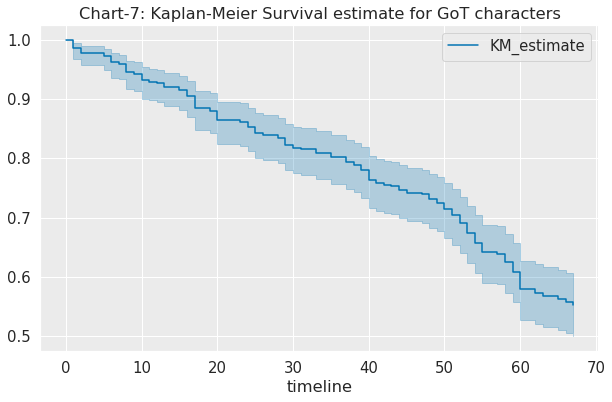

In [35]:
ax = kmf.plot_survival_function()
ax.set_title('Chart-7: Kaplan-Meier Survival estimate for GoT characters')
ax.get_figure().savefig("chart7.png")

In [36]:
kmf.predict(67)

0.5516304347826084

/usr/local/lib/python3.7/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:415: DeprecationWarning:

The `plot` function is deprecated, and will be removed in future versions. Use `plot_survival_function`

/usr/local/lib/python3.7/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:415: DeprecationWarning:

The `plot` function is deprecated, and will be removed in future versions. Use `plot_survival_function`



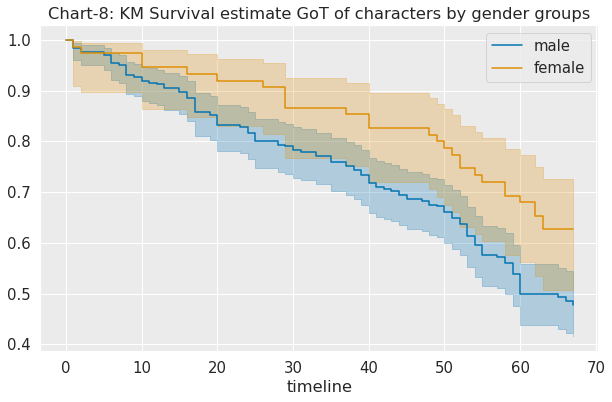

In [37]:
groups = character_df['gender']
g1 = (groups == 'male')
g2 = (groups == 'female')

kmf = KaplanMeierFitter()
kmf.fit(character_df['duration_in_episodes'][g1], character_df['is_dead'][g1], label='male')
ax = kmf.plot()

kmf.fit(character_df['duration_in_episodes'][g2], character_df['is_dead'][g2], label='female')
ax = kmf.plot(ax=ax)
ax.set_title('Chart-8: KM Survival estimate GoT of characters by gender groups')
ax.get_figure().savefig("chart8.png")

/usr/local/lib/python3.7/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:415: DeprecationWarning:

The `plot` function is deprecated, and will be removed in future versions. Use `plot_survival_function`

/usr/local/lib/python3.7/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:415: DeprecationWarning:

The `plot` function is deprecated, and will be removed in future versions. Use `plot_survival_function`



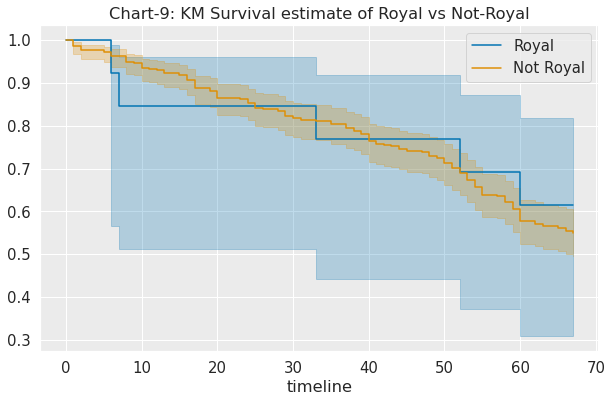

In [38]:
groups = character_df['royal']
g1 = (groups == 1)
g2 = (groups == 0)

kmf = KaplanMeierFitter()
kmf.fit(character_df['duration_in_episodes'][g1], character_df['is_dead'][g1], label='Royal')
ax = kmf.plot()

kmf.fit(character_df['duration_in_episodes'][g2], character_df['is_dead'][g2], label='Not Royal')
ax = kmf.plot(ax=ax)
ax.set_title('Chart-9: KM Survival estimate of Royal vs Not-Royal')
ax.get_figure().savefig("chart9.png")

/usr/local/lib/python3.7/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:415: DeprecationWarning:

The `plot` function is deprecated, and will be removed in future versions. Use `plot_survival_function`

/usr/local/lib/python3.7/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:415: DeprecationWarning:

The `plot` function is deprecated, and will be removed in future versions. Use `plot_survival_function`



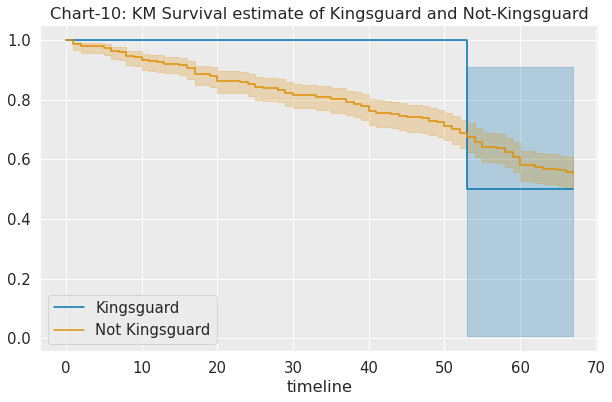

In [39]:
groups = character_df['kingsguard']
g1 = (groups == 1)
g2 = (groups == 0)

kmf = KaplanMeierFitter()
kmf.fit(character_df['duration_in_episodes'][g1], character_df['is_dead'][g1], label='Kingsguard')
ax = kmf.plot()

kmf.fit(character_df['duration_in_episodes'][g2], character_df['is_dead'][g2], label='Not Kingsguard')
ax = kmf.plot(ax=ax)
ax.set_title('Chart-10: KM Survival estimate of Kingsguard and Not-Kingsguard')
ax.get_figure().savefig("chart10.png")

/usr/local/lib/python3.7/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:415: DeprecationWarning:

The `plot` function is deprecated, and will be removed in future versions. Use `plot_survival_function`

/usr/local/lib/python3.7/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:415: DeprecationWarning:

The `plot` function is deprecated, and will be removed in future versions. Use `plot_survival_function`

/usr/local/lib/python3.7/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:415: DeprecationWarning:

The `plot` function is deprecated, and will be removed in future versions. Use `plot_survival_function`

/usr/local/lib/python3.7/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:415: DeprecationWarning:

The `plot` function is deprecated, and will be removed in future versions. Use `plot_survival_function`

/usr/local/lib/python3.7/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:415: DeprecationWarning:

The `plot` function is deprecated, and will be rem

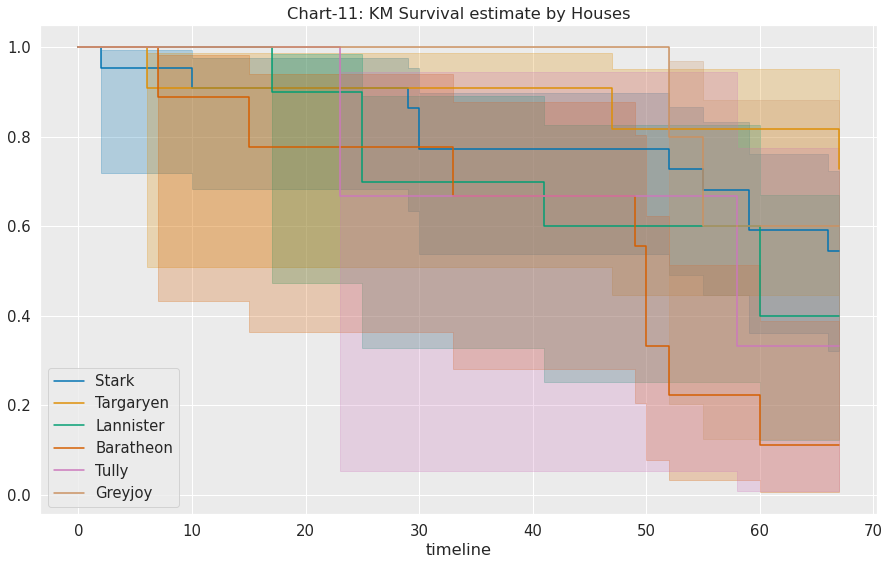

In [40]:
sns.set(palette = "colorblind", font_scale = 1.35, rc = {"figure.figsize": (15,9), "axes.facecolor": ".92"})

kmf = KaplanMeierFitter()
kmf.fit(character_df[(character_df.house.notnull()) & (character_df.house.str.contains('Stark'))]['duration_in_episodes'], 
        character_df[(character_df.house.notnull()) & (character_df.house.str.contains('Stark'))]['is_dead'], label='Stark')
ax = kmf.plot()

kmf.fit(character_df[(character_df.house.notnull()) & (character_df.house.str.contains('Targaryen'))]['duration_in_episodes'], 
        character_df[(character_df.house.notnull()) & (character_df.house.str.contains('Targaryen'))]['is_dead'], label='Targaryen')
ax = kmf.plot(ax=ax)

kmf.fit(character_df[(character_df.house.notnull()) & (character_df.house.str.contains('Lannister'))]['duration_in_episodes'], 
        character_df[(character_df.house.notnull()) & (character_df.house.str.contains('Lannister'))]['is_dead'], label='Lannister')
ax = kmf.plot(ax=ax)

kmf.fit(character_df[(character_df.house.notnull()) & (character_df.house.str.contains('Baratheon'))]['duration_in_episodes'], 
        character_df[(character_df.house.notnull()) & (character_df.house.str.contains('Baratheon'))]['is_dead'], label='Baratheon')
ax = kmf.plot(ax=ax)

kmf.fit(character_df[(character_df.house.notnull()) & (character_df.house.str.contains('Tully'))]['duration_in_episodes'], 
        character_df[(character_df.house.notnull()) & (character_df.house.str.contains('Tully'))]['is_dead'], label='Tully')
ax = kmf.plot(ax=ax)

kmf.fit(character_df[(character_df.house.notnull()) & (character_df.house.str.contains('Greyjoy'))]['duration_in_episodes'], 
        character_df[(character_df.house.notnull()) & (character_df.house.str.contains('Greyjoy'))]['is_dead'], label='Greyjoy')
ax = kmf.plot(ax=ax)
ax.set_title('Chart-11: KM Survival estimate by Houses')
ax.get_figure().savefig("chart11.png")

In [41]:
# df_r = character_df.set_index('character_name')

df_r = character_df.drop(['character_name'], axis=1)
df_r.house = df_r.house.fillna('')
df_r['house_Stark'] = [(1 if 'Stark' in item else 0) for item in df_r['house']]
df_r['house_Lannister'] = [(1 if 'Lannister' in item else 0) for item in df_r['house']]
df_r['house_Targaryen'] = [(1 if 'Targaryen' in item else 0) for item in df_r['house']]
df_r['house_Bolton'] = [(1 if 'Bolton' in item else 0) for item in df_r['house']]
df_r['house_Greyjoy'] = [(1 if 'Greyjoy' in item else 0) for item in df_r['house']]
df_r['house_Martell'] = [(1 if 'Martell' in item else 0) for item in df_r['house']]
df_r['house_Mormont'] = [(1 if 'Mormont' in item else 0) for item in df_r['house']]
df_r['house_Tarly'] = [(1 if 'Tarly' in item else 0) for item in df_r['house']]
df_r['house_Tully'] = [(1 if 'Tully' in item else 0) for item in df_r['house']]
df_r['house_Tyrell'] = [(1 if 'Tyrell' in item else 0) for item in df_r['house']]
df_r = df_r.drop(['house'], axis=1)

# removing per correlation matrix
df_r = df_r.drop(['s'+str(i)+'_ec' for i in range(1,8)], axis=1)
df_r = df_r.drop(['s'+str(i)+'_bc' for i in range(1,8)], axis=1)

# for i in range(1,8):
#     sp = 's' + str(i) + '_'
#     s_ec_min = df_r[sp+'ec'].min()
#     s_ec_max = df_r[sp+'ec'].max()
#     df_r[sp+'ec'] = df_r.apply(lambda x: (round((((100.00-10.00)*(x[sp+'ec']-s_ec_min))/(s_ec_max-s_ec_min)) + 10.00, 2) ), axis=1)

# /anaconda3/envs/dev2/lib/python3.7/site-packages/lifelines/utils/__init__.py:899: ConvergenceWarning: Column(s) ['s1_bc', 's1_pagerank', 's2_bc', 's2_pagerank', 's3_bc', 's3_pagerank', 's4_bc', 's4_pagerank', 's5_bc', 's5_pagerank', 's6_bc', 's6_pagerank', 's7_bc', 's7_pagerank'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
#   warnings.warn(warning_text, ConvergenceWarning)

df_dummy = pd.get_dummies(df_r, drop_first=True)

# df = character_df[['character_name']]
# df_dummy = df.merge(df_dummy, how='outer', left_index=True, right_index=True)

# df_dummy.head()

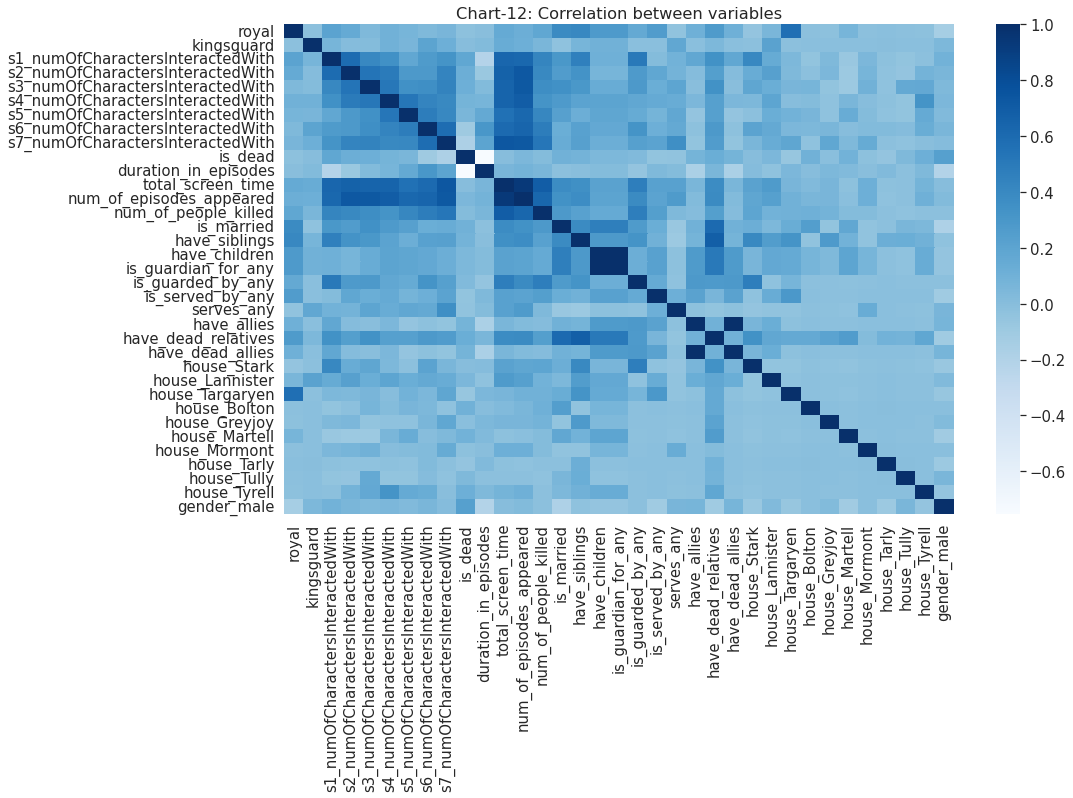

In [42]:
sns.set(palette = "colorblind", font_scale = 1.35, rc = {"figure.figsize": (15,9), "axes.facecolor": ".92"})
corr = df_dummy.corr()
# corr.style.background_gradient(cmap='coolwarm')

ax = plt.axes()
sns.heatmap(corr,ax = ax,xticklabels=corr.columns,yticklabels=corr.columns,cmap='Blues')

ax.set_title('Chart-12: Correlation between variables')
plt.show()

ax.get_figure().savefig("chart12.png")

# plot the heatmap
# sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,cmap="Blues")
# remove ec 

In [43]:
# df_dummy = df_dummy.drop(['total_screen_time','have_dead_allies','is_guardian_for_any','is_guarded_by_any','have_siblings','is_married'], axis=1)
df_dummy = df_dummy.drop(['num_of_episodes_appeared','have_allies','have_children','house_Bolton','house_Tyrell','house_Tarly'], axis=1)

# corr = df_dummy.corr()
# ax = plt.axes()
# sns.heatmap(corr,ax = ax,xticklabels=corr.columns,yticklabels=corr.columns,cmap='Blues')
# ax.set_title('Chart-13: Correlation between variables (after removing total_screen_time)')
# plt.show()
# ax.get_figure().savefig("chart13.png")

In [46]:
cph = CoxPHFitter()
cph.fit(df_dummy, 'duration_in_episodes', event_col='is_dead')
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 368 total observations, 203 right-censored observations>
             duration col = 'duration_in_episodes'
                event col = 'is_dead'
      baseline estimation = breslow
   number of observations = 368
number of events observed = 165
   partial log-likelihood = -878.70
         time fit was run = 2021-12-25 18:02:48 UTC

---
                                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                
royal                             -1.32       0.27       0.63            -2.56            -0.08                 0.08                 0.92
kingsguard                         1.00       2.72       1.12            -1.19             3.19                 0.31                24.27
s1_numOfCharactersInteractedWith   0.06       1.06       0.01             0.03             0.09                 1.03                 1.09
s2_numOfCharactersInteractedWith   0.02       1.02       0.02            -0.03             0.07                 0.97                 1.07
s3_numOfCharactersInteractedWith   0.02       1.02       0.02            -0.03             0.07                 0.97                 1.07
s4_numOfCharactersInteractedWith   0.01       1.01       0.02            -0.03             0.04                 0.97                 1.04
s5_numOfCharactersInteractedWith   0.02       1.02       0.02            -0.03             0.06                 0.97                 1.06
s6_numOfCharactersInteractedWith  -0.07       0.94       0.02            -0.11            -0.02                 0.90                 0.98
s7_numOfCharactersInteractedWith  -0.11       0.90       0.03            -0.17            -0.05                 0.84                 0.95
total_screen_time                 -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
num_of_people_killed               0.18       1.20       0.10            -0.02             0.38                 0.98                 1.46
is_married                         0.40       1.49       0.34            -0.28             1.08                 0.76                 2.93
have_siblings                     -0.10       0.91       0.39            -0.86             0.67                 0.42                 1.95
is_guardian_for_any               -0.15       0.86       0.34            -0.82             0.52                 0.44                 1.68
is_guarded_by_any                  0.17       1.19       0.71            -1.22             1.56                 0.30                 4.76
is_served_by_any                  -1.16       0.32       1.38            -3.85             1.54                 0.02                 4.69
serves_any                         0.06       1.06       0.55            -1.01             1.13                 0.36                 3.11
have_dead_relatives                0.30       1.35       0.31            -0.32             0.91                 0.73                 2.50
have_dead_allies                   0.94       2.56       0.70            -0.44             2.32                 0.64                10.19
house_Stark                       -0.88       0.42       0.57            -2.00             0.24                 0.13                 1.28
house_Lannister                    0.86       2.37       0.55            -0.21             1.94                 0.81                 6.95
house_Targaryen                    0.64       1.90       0.67            -0.66             1.95                 0.52                 7.01
house_Greyjoy                      0.33       1.39       0.82            -1.28             1.93                 0.28                 6.88
house_Martell                      1.02       2.77       0.50             0.05             1.99                 1.05                 7.31
house_Mormont                      0.

In [45]:
import os
import pandas as pd
import numpy as np
from dplython import (DplyFrame, X, diamonds, select, sift, sample_n, sample_frac, arrange, mutate, group_by, summarize)

from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config IPCompleter.greedy=True

# set some plotting aesthetics, similar to ggplot
sns.set(palette = "colorblind", font_scale = 1.35, rc = {"figure.figsize": (10,6), "axes.facecolor": ".92"})

# out_dir = '/Users/genie/dev/projects/github/got_survival_analysis/out'
# os.chdir(out_dir)

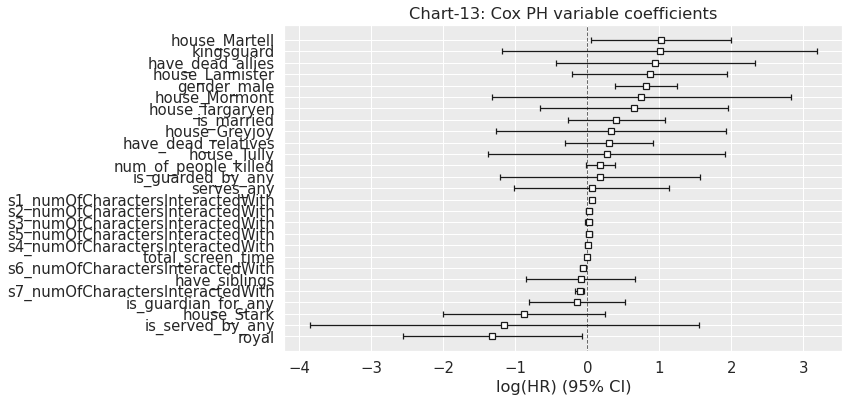

In [47]:
ax = cph.plot()
ax.set_title('Chart-13: Cox PH variable coefficients')
ax.get_figure().savefig("chart13.png")

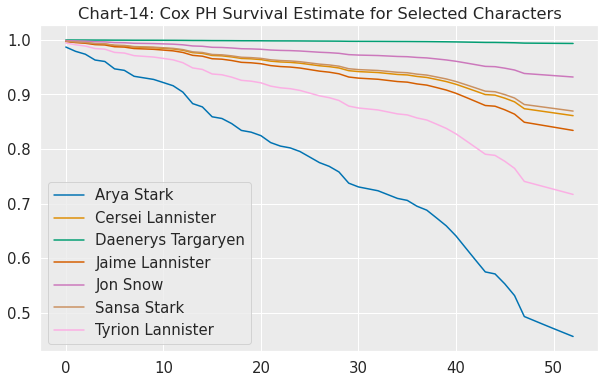

In [48]:
#tr_rows = df_dummy.iloc[10:20, ]
#tr_rows = df_dummy.iloc[character_df.index[(character_df.house.notnull()) & (character_df.house.str.contains('Stark'))].tolist(), ]

#df_dummy = df_dummy.set_index('character_name')

df2 = character_df[['character_name']]
df2 = df2.merge(df_dummy, how='outer', left_index=True, right_index=True)
tr_rows = df2[df2.character_name.isin(['Tyrion Lannister','Arya Stark','Cersei Lannister','Jaime Lannister','Jon Snow','Sansa Stark','Daenerys Targaryen'])]

tr_rows = tr_rows.set_index('character_name')
ax = cph.predict_survival_function(tr_rows).plot(use_index=False)
ax.set_title('Chart-14: Cox PH Survival Estimate for Selected Characters')
ax.get_figure().savefig("chart14.png")

# cph.predict_survival_function(tr_rows, [50,67])#.plot(use_index=False)

In [51]:
cph.predict_cumulative_hazard(tr_rows,[67])

,Arya Stark,Cersei Lannister,Daenerys Targaryen,Jaime Lannister,Jon Snow,Sansa Stark,Tyrion Lannister
67.0,0.783991,0.149434,0.006532,0.181358,0.070403,0.139712,0.332851


In [50]:
cph.predict_survival_function(tr_rows, [67])#.plot(use_index=False)

,Arya Stark,Cersei Lannister,Daenerys Targaryen,Jaime Lannister,Jon Snow,Sansa Stark,Tyrion Lannister
67.0,0.45658,0.861196,0.99349,0.834136,0.932018,0.869608,0.716877
